In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [293]:
dataset = pd.read_csv("datasets/bank/bank-full.csv", sep=";", na_values="unknown")

In [294]:
X = dataset.iloc[:, 0:-1]

In [295]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


In [296]:
X = X.values

In [297]:
X

array([[58, 'management', 'married', ..., -1, 0, nan],
       [44, 'technician', 'single', ..., -1, 0, nan],
       [33, 'entrepreneur', 'married', ..., -1, 0, nan],
       ...,
       [72, 'retired', 'married', ..., 184, 3, 'success'],
       [57, 'blue-collar', 'married', ..., -1, 0, nan],
       [37, 'entrepreneur', 'married', ..., 188, 11, 'other']],
      dtype=object)

In [298]:
y = dataset.iloc[:, -1]

In [299]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [300]:
y = y.values

In [301]:
# Integer Coulmns
# 0, 5, 9, 11, 12, 13, 14
# 1, 2, 3, 4, 6, 7, 8, 10, 15

X[:, [0, 5, 9, 11, 12, 13, 14]]


array([[58, 2143, 5, ..., 1, -1, 0],
       [44, 29, 5, ..., 1, -1, 0],
       [33, 2, 5, ..., 1, -1, 0],
       ...,
       [72, 5715, 17, ..., 5, 184, 3],
       [57, 668, 17, ..., 4, -1, 0],
       [37, 2971, 17, ..., 2, 188, 11]], dtype=object)

In [302]:
from sklearn.impute import SimpleImputer

In [303]:
sim = SimpleImputer()

In [304]:
X[:, [0, 5, 9, 11, 12, 13, 14]] # fields with numbers

array([[58, 2143, 5, ..., 1, -1, 0],
       [44, 29, 5, ..., 1, -1, 0],
       [33, 2, 5, ..., 1, -1, 0],
       ...,
       [72, 5715, 17, ..., 5, 184, 3],
       [57, 668, 17, ..., 4, -1, 0],
       [37, 2971, 17, ..., 2, 188, 11]], dtype=object)

In [305]:
X[:, [0, 5, 9, 11, 12, 13, 14]] = sim.fit_transform(X[:, [0, 5, 9, 11, 12, 13, 14]])

In [306]:
temp = pd.DataFrame(X[:, [0, 5, 9, 11, 12, 13, 14]]) # integer field
temp1 = pd.DataFrame(X[:, [1, 2, 3, 4, 6, 7, 8,  10, 15]]) # Text Fields

In [307]:
# jobs
temp1[0].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: 0, dtype: int64

In [308]:
# marital
temp1[1].value_counts()

married     27214
single      12790
divorced     5207
Name: 1, dtype: int64

In [309]:
# education
temp1[2].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: 2, dtype: int64

In [310]:
# default
temp1[3].value_counts()

no     44396
yes      815
Name: 3, dtype: int64

In [311]:
# housing
temp1[4].value_counts()

yes    25130
no     20081
Name: 4, dtype: int64

In [312]:
# loan
temp1[5].value_counts()

no     37967
yes     7244
Name: 5, dtype: int64

In [313]:
# contact
temp1[6].value_counts()

cellular     29285
telephone     2906
Name: 6, dtype: int64

In [314]:
# month
temp1[7].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: 7, dtype: int64

In [315]:
# poutcome
temp1[8].value_counts()

failure    4901
other      1840
success    1511
Name: 8, dtype: int64

In [316]:
temp1[0] = temp1[0].fillna('management')
temp1[1] = temp1[1].fillna('married')
temp1[2] = temp1[2].fillna('secondary')
temp1[3] = temp1[3].fillna('no')
temp1[4] = temp1[4].fillna('yes')
temp1[5] = temp1[5].fillna('no')
temp1[6] = temp1[6].fillna('cellular')
temp1[7] = temp1[7].fillna('may')
temp1[8] = temp1[8].fillna('failure')

In [317]:
X[:, [1, 2, 3, 4, 6, 7, 8,  10, 15]] = temp1

In [318]:
X

array([[58.0, 'management', 'married', ..., -1.0, 0.0, 'failure'],
       [44.0, 'technician', 'single', ..., -1.0, 0.0, 'failure'],
       [33.0, 'entrepreneur', 'married', ..., -1.0, 0.0, 'failure'],
       ...,
       [72.0, 'retired', 'married', ..., 184.0, 3.0, 'success'],
       [57.0, 'blue-collar', 'married', ..., -1.0, 0.0, 'failure'],
       [37.0, 'entrepreneur', 'married', ..., 188.0, 11.0, 'other']],
      dtype=object)

In [319]:
X[:, 0]

array([58.0, 44.0, 33.0, ..., 72.0, 57.0, 37.0], dtype=object)

In [320]:
from sklearn.preprocessing import LabelEncoder

In [321]:
lab = LabelEncoder()

In [322]:
X[:, 1] = lab.fit_transform(X[:, 1])
X[:, 2] = lab.fit_transform(X[:, 2])
X[:, 3] = lab.fit_transform(X[:, 3])
X[:, 4] = lab.fit_transform(X[:, 4])
X[:, 6] = lab.fit_transform(X[:, 6])
X[:, 7] = lab.fit_transform(X[:, 7])
X[:, 8] = lab.fit_transform(X[:, 8])
X[:, 10] = lab.fit_transform(X[:, 10])
X[:, 15] = lab.fit_transform(X[:, 15])

In [323]:
X

array([[58.0, 4, 1, ..., -1.0, 0.0, 0],
       [44.0, 9, 2, ..., -1.0, 0.0, 0],
       [33.0, 2, 1, ..., -1.0, 0.0, 0],
       ...,
       [72.0, 5, 1, ..., 184.0, 3.0, 2],
       [57.0, 1, 1, ..., -1.0, 0.0, 0],
       [37.0, 2, 1, ..., 188.0, 11.0, 1]], dtype=object)

In [324]:
# from sklearn.preprocessing import OneHotEncoder

In [325]:
# one = OneHotEncoder(categorical_features=[1, 2, 3, 4, 6, 7, 8,  10, 15])

In [326]:
# X = one.fit_transform(X)

In [327]:
# X = X.toarray()

In [328]:
# for i in X[1, :]:
#     print(i)

In [329]:
X

array([[58.0, 4, 1, ..., -1.0, 0.0, 0],
       [44.0, 9, 2, ..., -1.0, 0.0, 0],
       [33.0, 2, 1, ..., -1.0, 0.0, 0],
       ...,
       [72.0, 5, 1, ..., 184.0, 3.0, 2],
       [57.0, 1, 1, ..., -1.0, 0.0, 0],
       [37.0, 2, 1, ..., 188.0, 11.0, 1]], dtype=object)

In [330]:
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [331]:
y = lab.fit_transform(y)

In [332]:
lab.classes_

array(['no', 'yes'], dtype=object)

In [333]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [334]:
X[0, :]

array([58.0, 4, 1, 2, 0, 2143.0, 1, 0, 0, 5.0, 8, 261.0, 1.0, -1.0, 0.0,
       0], dtype=object)

[58.0 44.0 33.0 ... 72.0 57.0 37.0]


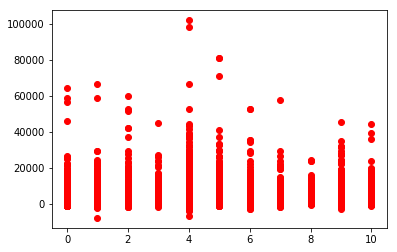

In [357]:
print(X[:, 0])
plt.plot(X[:, 1], X[:, 5], 'ro')
plt.show()